# Myers-Briggs Personality Classification with ML algorithms

#### This notebook includes following steps:
* Exploratory Data Analysis
* Data Cleaning
* Data Preprocessing
* Model Creation
* Model Training
* Model Evaluation and Selection


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
from itertools import chain
import contractions
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from nltk.collocations import TrigramAssocMeasures, TrigramCollocationFinder
from nltk import ngrams

### Load Dataset

In [2]:
data = pd.read_csv("dataset/mb_data.csv")
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


#### some information about dataset

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [4]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


### Class Distribution

In [5]:
_classes = data.type.unique()
print(_classes)

['INFJ' 'ENTP' 'INTP' 'INTJ' 'ENTJ' 'ENFJ' 'INFP' 'ENFP' 'ISFP' 'ISTP'
 'ISFJ' 'ISTJ' 'ESTP' 'ESFP' 'ESTJ' 'ESFJ']


In [6]:
def show_class_distribution(data, x="type", figsize=(16,4), title="Distribution of Personality Types", xticks_size=10, palette="husl"):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, data=data, palette=palette)
    plt.xlabel("Personality Types", size=15)
    plt.ylabel("Counts", size=15)
    plt.xticks(size=xticks_size)
    plt.title(title, size=20)
    plt.show()

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


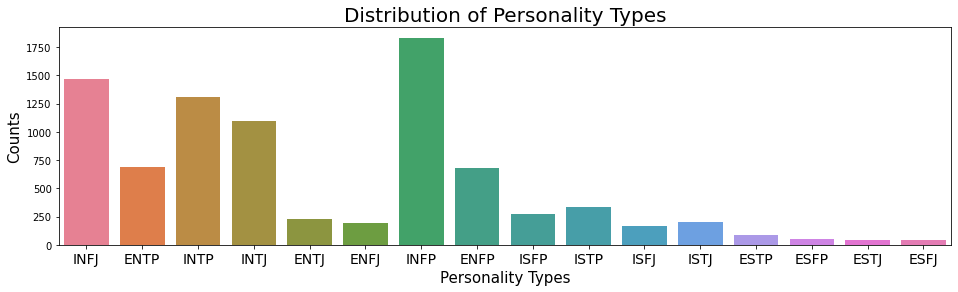

In [7]:
show_class_distribution(data, xticks_size=14)

In [8]:
def divide_types(df):
    df["E-I"] = ""
    df["N-S"] = ""
    df["F-T"] = ""
    df["J-P"] = ""
    for index, row in df.iterrows():
        row["E-I"] = "E" if row.type[0] == "E" else "I"
        row["N-S"] = "N" if row.type[1] == "N" else "S"
        row["F-T"] = "F" if row.type[2] == "F" else "T"
        row["J-P"] = "J" if row.type[3] == "J" else "P"
    return df

data = divide_types(data)

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


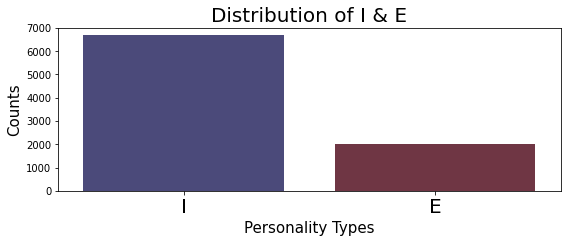

In [9]:
show_class_distribution(data, x="E-I", title="Distribution of I & E", figsize=(9,3), xticks_size=20, palette="icefire")

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


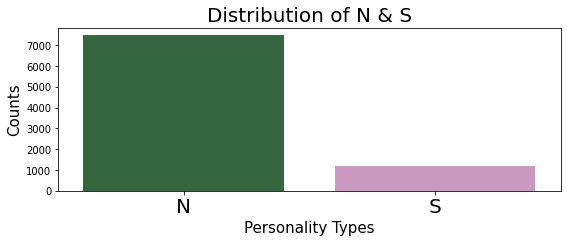

In [10]:
show_class_distribution(data, x="N-S", title="Distribution of N & S", figsize=(9,3), xticks_size=20, palette="cubehelix")

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


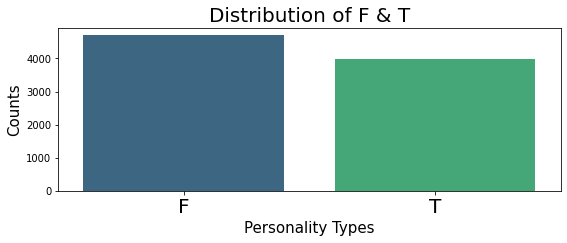

In [11]:
show_class_distribution(data, x="F-T", title="Distribution of F & T", figsize=(9,3), xticks_size=20, palette="viridis")

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


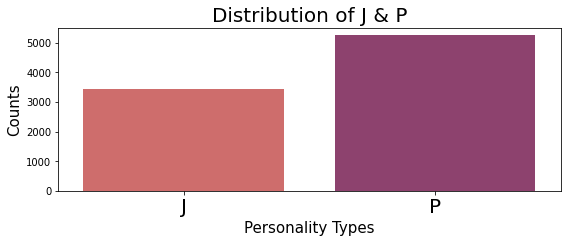

In [12]:
show_class_distribution(data, x="J-P", title="Distribution of J & P", figsize=(9,3), xticks_size=20, palette="flare")

#### sample post

In [13]:
data.loc[7, "posts"]

"'I tend to build up a collection of things on my desktop that i use frequently and then move them into a folder called  'Everything' from there it get sorted into type and sub type|||i ike to collect odd objects, even at work...a lot of people would call it junk but i like to collect it.  Old unused software? ill take that off your hands :) i have a bunch of old adobe...|||i think its quite normal, i tend to only see my friends in real life every couple of months, as said earlier some people just dont get it but the good ones do :)  Edit: i mostly mean tolerate it...|||where do we go when we sleep? is dreaming another form of being awake? how many more layers of this are there if any?   thoughts about sleep keep me up at night  Edit: sometimes im too scared...|||thanks|||i wish i was free to follow my interests as i desired  i feel as though wishes are meant for impossible things|||by seeing do you mean visual interpreting or seeing as in mentally understanding the concept?|||hello|||

### Cleaning

In [14]:
def fix_contractions(df, column_name = "posts", new_column="cleaned_post"):
    df[new_column] = df[column_name].apply(lambda x: contractions.fix(x))
    return df

data = fix_contractions(data)

In [15]:
def clean_data(df, column_name = "cleaned_post"):
    df[column_name] = df[column_name].apply(lambda x: x.lower())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'@([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'#([a-zA-Z0-9_]{1,50})', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'http[s]?://\S+', '', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r'[^A-Za-z]+', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: re.sub(r' +', ' ', x))
    df[column_name] = df[column_name].apply(lambda x: " ".join([word for word in x.split() if not len(word) <3]))
    return df

data = clean_data(data)

#### cleaned post

In [16]:
data.loc[7,"cleaned_post"]

'tend build collection things desktop that use frequently and then move them into folder called everything from there get sorted into type and sub type ike collect odd objects even work lot people would call junk but like collect old unused software ill take that off your hands have bunch old adobe think its quite normal tend only see friends real life every couple months said earlier some people just not get but the good ones edit mostly mean tolerate where when sleep dreaming another form being awake how many more layers this are there any thoughts about sleep keep night edit sometimes too scared thanks wish was free follow interests desired feel though wishes are meant for impossible things seeing you mean visual interpreting seeing mentally understanding the concept hello feel though incapable creating anything and wish could cannot stand the interviewer christ that laugh intj hmmm would interesting see intj this show doubt they would that interesting the general public though know

In [17]:
data["words_count"] = data["cleaned_post"].apply(lambda x: len(x.split()))
data.head(5)

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782


In [18]:
def plot_counts(df, column, xlabel):
    fig = plt.figure()
    plt.xlabel(xlabel)
    plt.ylabel("Frequency")
    df[column].plot.hist(bins=25)

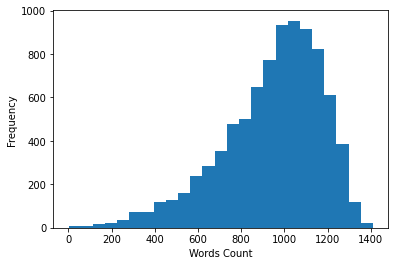

In [19]:
plot_counts(data, column="words_count", xlabel="Words Count")

In [20]:
data["char_count"] = data["cleaned_post"].apply(lambda x: len(x))
data.head(5)

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692


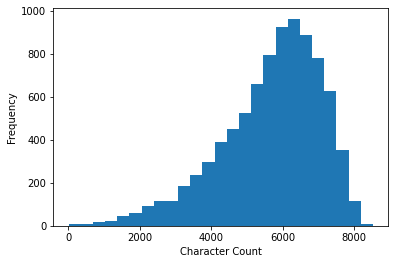

In [21]:
plot_counts(data, column="char_count", xlabel="Character Count")

### Most Frequent Words

In [22]:
stopword_list = stopwords.words("english")

In [23]:
def get_most_frequent(data, stop_words, column="cleaned_post", top=25):
    df = data[column].apply(lambda x: " ".join([word for word in x.split() if not word in stop_words]))
    counter = Counter(" ".join(df).split())
    return counter.most_common(top)

In [24]:
most_frequents = get_most_frequent(data, stopword_list)
most_frequents[:10]

[('like', 69678),
 ('would', 52964),
 ('think', 49837),
 ('people', 48150),
 ('know', 38174),
 ('one', 37173),
 ('really', 35343),
 ('get', 30806),
 ('time', 27610),
 ('feel', 23337)]

In [25]:
def show_most_frequents(most_frequent_words, top=20):
    most_frequent_df = pd.DataFrame(most_frequent_words)    
    plt.figure(figsize=(16,4))
    my_cmap = plt.get_cmap("viridis")
    plt.bar(x=most_frequent_df.iloc[:top, 0], height=most_frequent_df.iloc[:top, 1], color="slateblue")
    plt.xlabel("Words", size=17)
    plt.ylabel("Counts", size=17)
    plt.title("Most Frequent Words", size = 20)
    plt.show()

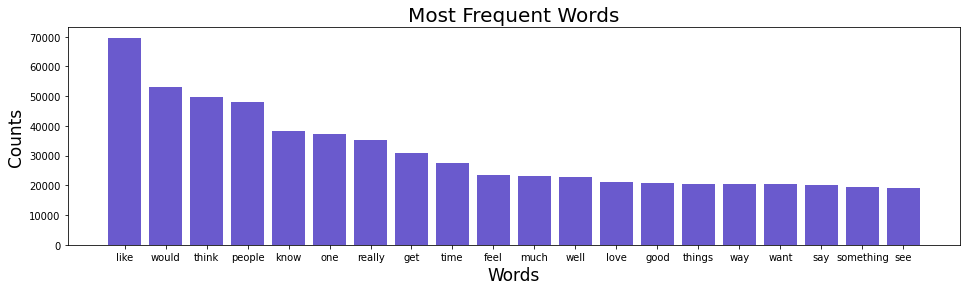

In [26]:
show_most_frequents(most_frequents)

### N-Grams

In [27]:
def get_ngrams(data, n_gram, new_column, column="cleaned_post"):
    data["tokenized"]  = data[column].apply(lambda x: x.split())
    data["sw_removal"] = data["tokenized"].apply(lambda x: [y for y in x if not y in stopword_list])
    data[new_column]   = data["sw_removal"].apply(lambda x: list(ngrams(x, n_gram)))
    data.drop(columns  = ["tokenized", "sw_removal"], inplace=True)
    return data

In [28]:
data = get_ngrams(data, n_gram=2, new_column="bigrams")
data.head()

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count,bigrams
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764,"[(intj, moments), (moments, sportscenter), (sp..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104,"[(finding, lack), (lack, posts), (posts, alarm..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000,"[(good, one), (one, course), (course, say), (s..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938,"[(dear, intp), (intp, enjoyed), (enjoyed, conv..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692,"[(fired, another), (another, silly), (silly, m..."


In [29]:
data = get_ngrams(data, n_gram=3, new_column="trigrams")
data.head()

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count,bigrams,trigrams
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,and intj moments sportscenter not top ten play...,454,2764,"[(intj, moments), (moments, sportscenter), (sp...","[(intj, moments, sportscenter), (moments, spor..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding the lack these posts very alarming sex...,874,5104,"[(finding, lack), (lack, posts), (posts, alarm...","[(finding, lack, posts), (lack, posts, alarmin..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course which say know that blessing a...,653,4000,"[(good, one), (one, course), (course, say), (s...","[(good, one, course), (one, course, say), (cou..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed our conversation the other d...,820,4938,"[(dear, intp), (intp, enjoyed), (enjoyed, conv...","[(dear, intp, enjoyed), (intp, enjoyed, conver..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,you are fired that another silly misconception...,782,4692,"[(fired, another), (another, silly), (silly, m...","[(fired, another, silly), (another, silly, mis..."


In [30]:
def most_common_ngram(data, column, top=20):
    temp = []
    for index, row in data.iterrows():
        temp += row[column]
    most_common = Counter(temp).most_common(top)
    return most_common

In [31]:
def plot_n_grams(ngrams, title, top=20):
    ngram_df = pd.DataFrame(ngrams)
    ngram_df.iloc[:, 0] = ngram_df.iloc[:,0].astype(str)
    plt.figure(figsize=(7,7))
    plt.barh(y=ngram_df.iloc[:top, 0], width=ngram_df.iloc[:top, 1])
    plt.xlabel("Counts", size=17)
    plt.ylabel("Pairs", size=17)
    plt.title(title, size = 20)
    plt.show() 

In [32]:
bigrams_most_common = most_common_ngram(data, "bigrams")
bigrams_most_common

[(('feel', 'like'), 5642),
 (('would', 'say'), 4073),
 (('would', 'like'), 3429),
 (('sounds', 'like'), 2606),
 (('pretty', 'much'), 2409),
 (('high', 'school'), 2216),
 (('even', 'though'), 1922),
 (('seems', 'like'), 1902),
 (('best', 'friend'), 1692),
 (('really', 'like'), 1576),
 (('think', 'would'), 1573),
 (('get', 'along'), 1551),
 (('years', 'ago'), 1460),
 (('long', 'time'), 1459),
 (('using', 'tapatalk'), 1376),
 (('personality', 'type'), 1337),
 (('someone', 'else'), 1272),
 (('many', 'people'), 1270),
 (('something', 'like'), 1267),
 (('people', 'think'), 1219)]

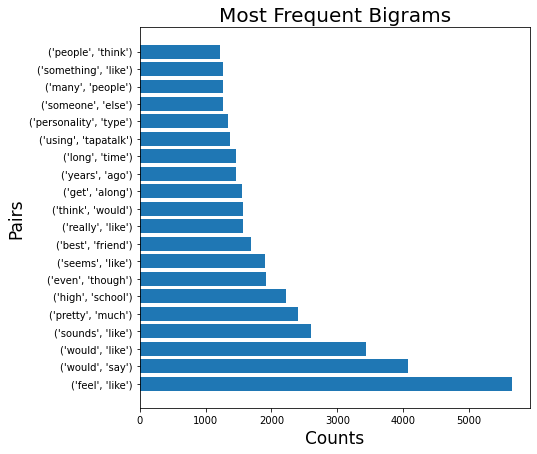

In [33]:
plot_n_grams(bigrams_most_common, title="Most Frequent Bigrams")

In [34]:
trigrams_most_common = most_common_ngram(data, "trigrams")
trigrams_most_common

[(('sent', 'iphone', 'using'), 702),
 (('iphone', 'using', 'tapatalk'), 686),
 (('sent', 'using', 'tapatalk'), 331),
 (('one', 'best', 'friends'), 280),
 (('get', 'along', 'well'), 253),
 (('sometimes', 'feel', 'like'), 207),
 (('would', 'like', 'know'), 192),
 (('long', 'time', 'ago'), 183),
 (('low', 'self', 'esteem'), 173),
 (('anything', 'may', 'affect'), 173),
 (('may', 'affect', 'way'), 171),
 (('affect', 'way', 'answer'), 168),
 (('yes', 'yes', 'yes'), 168),
 (('spend', 'lot', 'time'), 165),
 (('wikipedia', 'free', 'encyclopedia'), 162),
 (('way', 'answer', 'questions'), 158),
 (('answer', 'questions', 'example'), 150),
 (('questions', 'example', 'stressful'), 145),
 (('example', 'stressful', 'time'), 144),
 (('stressful', 'time', 'mental'), 140)]

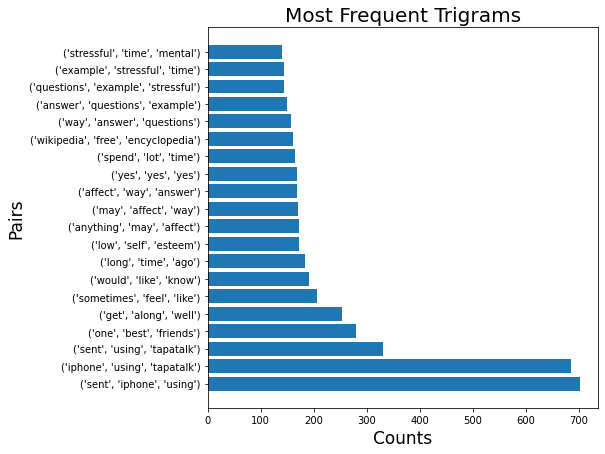

In [35]:
plot_n_grams(trigrams_most_common, title="Most Frequent Trigrams")

### preprocessing

In [36]:
def remove_stopwords(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(word_tokenize)
    data[column] = data[column].apply(lambda x: [word for word in x if not word in stopword_list])
    return data

In [37]:
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(w) for w in text]

In [38]:
def lemmatize(data, stopword_list, column="cleaned_post"):
    data[column] = data[column].apply(apply_lemmatization)
    data[column] = data[column].apply(" ".join)
    return data

In [39]:
data = remove_stopwords(data, stopword_list)

In [40]:
data = lemmatize(data, stopword_list)

In [41]:
data.head()

,type,posts,E-I,N-S,F-T,J-P,cleaned_post,words_count,char_count,bigrams,trigrams
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,I,N,F,J,intj moment sportscenter top ten play prank li...,454,2764,"[(intj, moments), (moments, sportscenter), (sp...","[(intj, moments, sportscenter), (moments, spor..."
1,ENTP,'I'm finding the lack of me in these posts ver...,E,N,T,P,finding lack post alarming sex boring position...,874,5104,"[(finding, lack), (lack, posts), (posts, alarm...","[(finding, lack, posts), (lack, posts, alarmin..."
2,INTP,'Good one _____ https://www.youtube.com/wat...,I,N,T,P,good one course say know blessing curse absolu...,653,4000,"[(good, one), (one, course), (course, say), (s...","[(good, one, course), (one, course, say), (cou..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",I,N,T,J,dear intp enjoyed conversation day esoteric ga...,820,4938,"[(dear, intp), (intp, enjoyed), (enjoyed, conv...","[(dear, intp, enjoyed), (intp, enjoyed, conver..."
4,ENTJ,'You're fired.|||That's another silly misconce...,E,N,T,J,fired another silly misconception approaching ...,782,4692,"[(fired, another), (another, silly), (silly, m...","[(fired, another, silly), (another, silly, mis..."


In [42]:
training_data = data[["cleaned_post", "E-I", "N-S", "F-T", "J-P"]].copy()
training_data.head(5)

,cleaned_post,E-I,N-S,F-T,J-P
0,intj moment sportscenter top ten play prank li...,I,N,F,J
1,finding lack post alarming sex boring position...,E,N,T,P
2,good one course say know blessing curse absolu...,I,N,T,P
3,dear intp enjoyed conversation day esoteric ga...,I,N,T,J
4,fired another silly misconception approaching ...,E,N,T,J


In [43]:
def make_dummies(data, columns=["E-I", "N-S", "F-T", "J-P"]):
    for column in columns:
        temp_dummy = pd.get_dummies(data[column], prefix="type")
        data = data.join(temp_dummy)
    return data

In [44]:
training_data = make_dummies(training_data)
training_data.head()

,cleaned_post,E-I,N-S,F-T,J-P,type_E,type_I,type_N,type_S,type_F,type_T,type_J,type_P
0,intj moment sportscenter top ten play prank li...,I,N,F,J,0,1,1,0,1,0,1,0
1,finding lack post alarming sex boring position...,E,N,T,P,1,0,1,0,0,1,0,1
2,good one course say know blessing curse absolu...,I,N,T,P,0,1,1,0,0,1,0,1
3,dear intp enjoyed conversation day esoteric ga...,I,N,T,J,0,1,1,0,0,1,1,0
4,fired another silly misconception approaching ...,E,N,T,J,1,0,1,0,0,1,1,0


#### Handling Imbalanced Data

In [45]:
X = training_data[["cleaned_post"]]
y = training_data.drop(columns=["cleaned_post"])

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\1038188885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=_x, data=data, palette=palette)
C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\1038188885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=_x, data=data, palette=palette)
C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\1038188885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=_x, data=data, palette=palette)
C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\1038188885.py:6: FutureWarning: 

Passing `pal

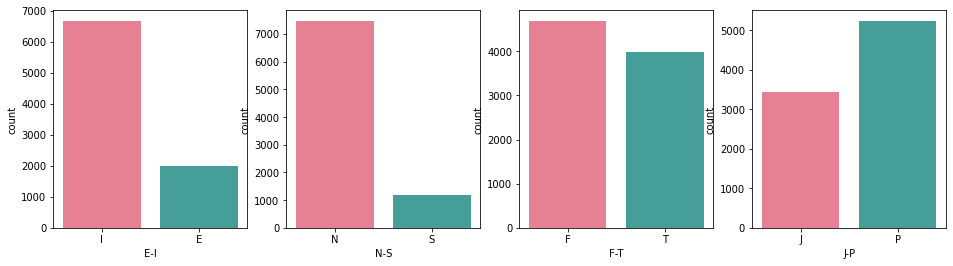

In [46]:
def show_distribution(data, x=["E-I", "N-S", "F-T","J-P"], fig_size=(16,4), xticks_size=10, palette="husl"):
    fig, ax = plt.subplots(len(x), figsize=fig_size)
    j = 0
    for _x in x:
        plt.subplot(1,4, j+1)
        sns.countplot(x=_x, data=data, palette=palette)
        plt.xticks(size=xticks_size)
        j+=1    
        
show_distribution(data)

In [47]:
from imblearn.over_sampling import RandomOverSampler

In [48]:
oversample = RandomOverSampler()

In [49]:
y_ei = y["type_E"]
y_ns = y["type_N"]
y_ft = y["type_F"]
y_jp = y["type_J"]

In [50]:
X_over_ei, y_over_ei = oversample.fit_resample(X, y_ei)
X_over_ns, y_over_ns = oversample.fit_resample(X, y_ns)
X_over_ft, y_over_ft = oversample.fit_resample(X, y_ft)
X_over_jp, y_over_jp = oversample.fit_resample(X, y_jp)

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


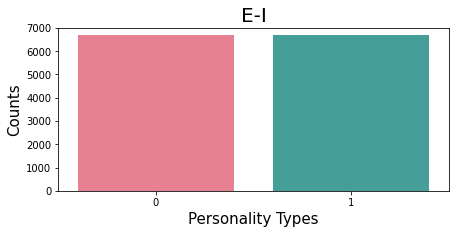

In [51]:
show_class_distribution(data=X_over_ei, x=y_over_ei, figsize=(7,3), title="E-I")

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


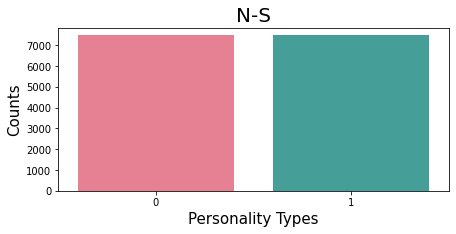

In [52]:
show_class_distribution(data=X_over_ns, x=y_over_ns, figsize=(7,3), title="N-S")

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


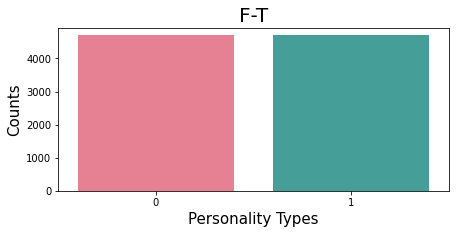

In [53]:
show_class_distribution(data=X_over_ft, x=y_over_ft, figsize=(7,3), title="F-T")

C:\Users\Mithul\AppData\Local\Temp\ipykernel_14732\4249258103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette)


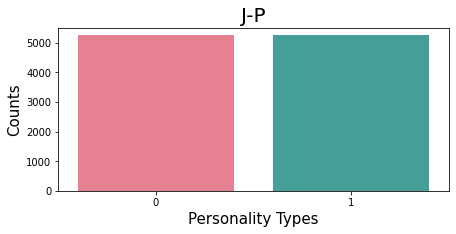

In [54]:
show_class_distribution(data=X_over_jp, x=y_over_jp, figsize=(7,3), title="J-P")

#### Train-test split for each classes

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train_ei, X_test_ei, y_train_ei, y_test_ei = train_test_split(X_over_ei, y_over_ei, test_size=0.3, random_state=42)
X_train_ns, X_test_ns, y_train_ns, y_test_ns = train_test_split(X_over_ns, y_over_ns, test_size=0.3, random_state=42)
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_over_ft, y_over_ft, test_size=0.3, random_state=42)
X_train_jp, X_test_jp, y_train_jp, y_test_jp = train_test_split(X_over_jp, y_over_jp, test_size=0.3, random_state=42)

In [57]:
X_train_ei = X_train_ei['cleaned_post']
X_train_ns = X_train_ns['cleaned_post']
X_train_ft = X_train_ft['cleaned_post']
X_train_jp = X_train_jp['cleaned_post']

In [58]:
X_test_ei = X_test_ei['cleaned_post']
X_test_ns = X_test_ns['cleaned_post']
X_test_ft = X_test_ft['cleaned_post']
X_test_jp = X_test_jp['cleaned_post']

In [59]:
y_train_ei.name, y_test_ei.name = "E-I", "E-I"
y_train_ns.name, y_test_ns.name = "N-S", "N-S"
y_train_ft.name, y_test_ft.name = "F-T", "F-T"
y_train_jp.name, y_test_jp.name = "J-P", "J-P"

In [60]:
y_all_train = [y_train_ei, y_train_ns, y_train_ft,  y_train_jp]
y_all_test  = [y_test_ei, y_test_ns, y_test_ft, y_test_jp] 

### TF-IDF Vectorizer

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
vectorizer = TfidfVectorizer(max_features=10000)

In [63]:
vectorizer.fit(X_train_ei)

TfidfVectorizer(max_features=10000)

In [64]:
X_train_ei = vectorizer.transform(X_train_ei)
X_test_ei  = vectorizer.transform(X_test_ei)

X_train_ns = vectorizer.transform(X_train_ns)
X_test_ns  = vectorizer.transform(X_test_ns)

X_train_ft = vectorizer.transform(X_train_ft)
X_test_ft  = vectorizer.transform(X_test_ft)

X_train_jp = vectorizer.transform(X_train_jp)
X_test_jp  = vectorizer.transform(X_test_jp)

In [65]:
x_all_train = [X_train_ei, X_train_ns, X_train_ft, X_train_jp]
x_all_test  = [X_test_ei, X_test_ns, X_test_ft, X_test_jp]

In [66]:
tf_idf = pd.DataFrame(X_test_ei.toarray(), columns=vectorizer.get_feature_names_out())
tf_idf.head(10)

,aaaand,aang,ab,aback,abandon,abandoned,abandonment,abbreviation,abhor,ability,...,zero,zip,zodiac,zoe,zombie,zone,zoned,zoning,zoo,zooey
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.122238,0.0,0.0,0.045706,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030691,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


## Model Creation & Model Training & Model Saving

In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
import pickle
from sklearn import metrics

In [68]:
def create_models():
    nb_clf  = MultinomialNB(alpha=0.01)
    svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
    dt_clf  = DecisionTreeClassifier(max_depth=7)
    rf_clf  = RandomForestClassifier(n_estimators=750)
    xgb_clf = xgboost.XGBClassifier(use_label_encoder=False)
    return {"NaiveBayes":nb_clf, "SVM":svm_clf, "DecisionTree":dt_clf, "RandomForest":rf_clf, "Xgboost":xgb_clf}

#### Model Performance Evaluation with accuracy & f1-score & roc-auc score

In [69]:
_metrics = ["Accuracy", "Accuracy", "Accuracy" ,"Accuracy", "Precision", "Precision", "Precision","Precision", "Recall","Recall","Recall","Recall", "F1-Score", "F1-Score", "F1-Score", "F1-Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score", "Roc-Auc Score"]
_types   = ["E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P", "E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P","E-I", "N-S", "F-T", "J-P"]
_columns = ["NaiveBayes", "SVM", "DecisionTree", "RandomForest", "Xgboost"]

In [70]:
evaluation_df = pd.DataFrame(columns=_columns, index=[_metrics, _types])
evaluation_df

NaiveBayes  SVM DecisionTree RandomForest Xgboost
Accuracy      E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
Precision     E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
Recall        E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
F1-Score      E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN
Roc-Auc Score E-I        NaN  NaN          NaN          NaN     NaN
              N-S        NaN  NaN          NaN          NaN     NaN
              F-T        NaN  NaN          NaN          NaN     NaN
              J-P        NaN  NaN          NaN          NaN     NaN

In [71]:
models = create_models()
models

{'NaiveBayes': MultinomialNB(alpha=0.01),
 'SVM': SVC(gamma='auto', kernel='linear'),
 'DecisionTree': DecisionTreeClassifier(max_depth=7),
 'RandomForest': RandomForestClassifier(n_estimators=750),
 'Xgboost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)}

In [72]:
for model_item in models.items():
    for X_train, X_test, y_train, y_test in zip(x_all_train, x_all_test, y_all_train, y_all_test):
        # Model creation and prediction
        model = model_item[1]
        print(f"{model} is training for {y_train.name}...")
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        # Performance evaluation metrics
        evaluation_df.loc["Accuracy",y_train.name][model_item[0]]      = round(metrics.accuracy_score(y_test, pred), 3)
        evaluation_df.loc["Precision",y_train.name][model_item[0]]     = round(metrics.precision_score(y_test, pred), 3)
        evaluation_df.loc["Recall",y_train.name][model_item[0]]        = round(metrics.recall_score(y_test, pred), 3)        
        evaluation_df.loc["F1-Score",y_train.name][model_item[0]]      = round(metrics.f1_score(y_test, pred), 3)
        evaluation_df.loc["Roc-Auc Score",y_train.name][model_item[0]] = round(metrics.roc_auc_score(y_test, pred), 3)        
        # Save model
        filename = f'saved-models/{model_item[0]}_{y_test.name}.sav'
        pickle.dump(model,open(filename, 'wb'))

MultinomialNB(alpha=0.01) is training for E-I...
MultinomialNB(alpha=0.01) is training for N-S...
MultinomialNB(alpha=0.01) is training for F-T...
MultinomialNB(alpha=0.01) is training for J-P...
SVC(gamma='auto', kernel='linear') is training for E-I...


SVC(gamma='auto', kernel='linear') is training for N-S...
SVC(gamma='auto', kernel='linear') is training for F-T...
SVC(gamma='auto', kernel='linear') is training for J-P...
DecisionTreeClassifier(max_depth=7) is training for E-I...
DecisionTreeClassifier(max_depth=7) is training for N-S...
DecisionTreeClassifier(max_depth=7) is training for F-T...
DecisionTreeClassifier(max_depth=7) is training for J-P...
RandomForestClassifier(n_estimators=750) is training for E-I...
RandomForestClassifier(n_estimators=750) is training for N-S...
RandomForestClassifier(n_estimators=750) is training for F-T...
RandomForestClassifier(n_estimators=750) is training for J-P...


In [ ]:
evaluation_df

NaiveBayes    SVM DecisionTree RandomForest Xgboost
Accuracy      E-I      0.823  0.896        0.796        0.952   0.936
              N-S      0.905  0.953        0.797        0.993   0.972
              F-T      0.812  0.856        0.749        0.845   0.845
              J-P      0.732   0.81        0.735         0.84   0.841
Precision     E-I      0.827  0.882        0.835        0.986   0.914
              N-S      0.908   0.98        0.765        0.991   0.998
              F-T      0.806  0.851        0.747        0.831   0.843
              J-P      0.728  0.801        0.772         0.91   0.827
Recall        E-I      0.818  0.915         0.74        0.918   0.964
              N-S      0.903  0.926        0.863        0.995   0.947
              F-T       0.82  0.861        0.751        0.866   0.846
              J-P      0.735  0.821        0.662        0.752   0.859
F1-Score      E-I      0.823  0.898        0.785        0.951   0.938
              N-S      0.905  0.953        0.811        0.993   0.972
              F-T      0.813  0.856        0.749        0.848   0.845
              J-P      0.731  0.811        0.713        0.824   0.843
Roc-Auc Score E-I      0.823  0.896        0.797        0.952   0.936
              N-S      0.905  0.954        0.797        0.993   0.973
              F-T      0.812  0.856        0.749        0.845   0.845
              J-P      0.732   0.81        0.734         0.84   0.841

In [ ]:
### Save Tf-Idf Vectorizer

In [ ]:
filename = 'vectorizer.pkl'
pickle.dump(vectorizer,open(filename, 'wb'))

In [ ]:
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import contractions
import re
from nltk.tokenize import word_tokenize
import pandas as pd

In [ ]:
sample_1 = "War zone detected|||I have been a member of this website for quite a long time but never introduced myself properly yet so hi :proud:  How is it like to be an INTJ girl ? it is just like being the dark lord the...|||Nope|||What's empathy?|||1 I guess it's true 2 very true I tend to enjoy burning people in video games 3 I love it when people try to hurt my feelings when I don't have any 4 nope I'm a very religious muslim 5 not really...|||I love it when people try to hurt my feelings when I don't have any|||if you look closely you could see why my teachers don't correct my note books 232090|||That's complete bullshit I love INFPs even one of my best friends is one , personally I think INFPs choose to keep their feelings to themselves because they just like it that way or feel more...|||I just want to abandon everything and all the shitty responsibilities and move to live in a peaceful town in the country and change my name and live surrounded by kind neighbors in a bloody forest...|||You're actually being nice lol , now let me show you true evil . I once wrote a note to a girl I hate in the fourth grade I used to copy from some other girl's note book and I accurately copied her...|||Thank you so much , you're among the few rare guys who don't fall head over heels for duck face swag girls , faith in humanity restored|||Saying no offense then insulting is just like making out with a gay guy then saying no homo|||I'm not that serious at all I'm the biggest troll in the universe and I love it :laughing: Not all guys are the same so definitely there must be guys who like ENTP girls maybe|||Do you tend to stay up till 4:00 am just to enjoy the peaceful silence After everyone else falls asleep?|||INTJs during stop smoking campaigns https://38.media.tumblr.com/573c0f6277cdbd29ed84df073bd4fce7/tumblr_mlslnzsrrr1rdo35ho3_500.gif|||One word TROLOLOLOLOLLLOLOLOL|||ENTPs are not even an option well I'm butt burned|||I would suggest watching darker than black it's simply amazing|||I will admit I am attracted to assholes it's just the smell of farts it's simply irresistible|||you talk weird ... I like it !  http://img2.wikia.nocookie.net/__cb20131222000900/degrassi/images/2/26/Jonghyun_Dance.gif|||hell yeah but first you have to prove that you're fabulous enough to hang out with me *flips hair*|||My work here is done|||nope , did I write a grammatical error ?|||You will never know :crazy:  http://play.shopatsauce.com/assets/media/2013/07/pusheen.gif|||The investigators                                The criminals 1 shinya                                             Shogo 2 ginoza                                                                   ...|||I know shuusei was my favourite :crying: why did that horrible sick robot woman kill him . MAN i wana kill the sibyl system for that  we will randomize but the both of us will get to be who we want...|||yes ! I played many mafia games . lets start by decieding who plays what character and the number of characters   I wana be makishma shogo|||What are we waiting for lets make one right NOW !!!:crazy:  I bet it would be 100000 X times better than all the other mafia games   lets discuss the rules|||Lady Lunar and Hotaru  you guys must try this anime it's amazing . here is the trailer   http://www.youtube.com/watch?v=Agnrim_5pio|||http://img1.ak.crunchyroll.com/i/spire2/08232008/0/5/f/e/05fe1f3eafbbb0_full.gif|||do you like to troll and mess around :P|||http://37.media.tumblr.com/tumblr_lr6j8egSfl1r08wr9o1_400.gif|||lets run away  together lol|||the more your parents become controlling the more they care about you it's just that they don't show that care properly . try to talk to them or just wait till you are grown enough to leave them...|||http://www.mymangamarathon.com/wp-content/uploads/2014/07/BlueExorcistGIF.gif|||no they're family they will probably be supportive instead of thinking of you as a burden|||lmafo , I'm studying business so I have a chance :P|||yes it is I want to be an artist but I'm afraid of regretting it later most art graduates found no job and are facing a lot of troubles the risks are massive|||Those are my favorite hobbies too ! , especially the making music part I'm a violinist and a water color artist . It's just that I don't get to do what I want parents want me to study and no time...|||I bet I have the same do because have to and i bet you hate them too . i want to know the ones you're passionate about|||what are your hobbies?|||lol when you're asleep :crazy:|||anybody in a mood to chat?|||lol this thread is funny|||the powers are too strong I'm attracted :frustrating:|||WHY U DO DIS   I watched Reboot like 5 five times and cried 50000 times :frustrating: it's still  the most amazing|||I love the beautiful art works on deviantart so this thread is made to show off beautiful favourite paintings and art works of talented artists    Spring  Yuumei...|||Do you just do this on exhausting days?  http://i.imgur.com/M2EaiMp.gif|||I just re watched them all !!  http://mashable.com/wp-content/uploads/2013/07/crying-waterfalls.gif   they still make meh cry so beautiful  I always loved vocaloid and will always do . here is...|||your profile picture isn't it the girl from just be friends?  https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcRG4knylGi5uIyV1ha4kzlwGUA1lICCGKGh4mzPO9ugmaV0QaiZ4g"

sample_2 = "'These are two very good reasons as to why I would drop friends as well. 1. If someone has a mental illness, it is NEVER okay to make fun of them no matter how badly they may have treated them before....|||Absolutely, it is never final. We would give them another chance if they show that they will change.    It's funny, I always thought I was the one with the problem with keeping in touch with...|||My best friend is an ESFJ. She does not like to show that she is warm or nurturing but it shines right through. It's cute how she thinks she can hide it. She is not as bad as she'd like to think she...|||Lots of water lol. Oh and sunglasses and shorts. I live in shorts in the Spring and Summer.|||This is actually very encouraging. I have to work on thinking this way.|||Yes, I believe this is why people do it too. They just like to brag and show proof that they were actually there.|||I know an ENFJ who does this exact thing! It's so frustrating. I'd love some insight as well.|||Trying to be extroverted can be a whole nother job in itself lol|||You took the words right out of my mouth. We were made introverts and extroverts for a reason. We do not have to stress ourselves out trying to be the opposite type.|||If you're poor (or think you are) how do you feed yourself? How much money do you spend a week on food?  I don't think I'm poor but I also do not have the most money in the world. I spend about...|||This was sooooo deep. You have me feeling guilty for things I've said to every other personality type in my past now:laughing:. I think everyone could all get on the same page if we just all took the...|||Either Catfish or Spongebob. I can't remember. From one extreme to the next :laughing:|||You're right. I didn't even look at it that way:tongue:.|||I was thinking the same thing. hahaha|||Oh em gee. That is so dangerous! I'm not a violent person but I think I would've punched that kid too.     I have been in physical fights when I was younger. People thought because I was so quiet...|||Yes, what they said. hahaha. ISFJ's just want you to listen to them intentively. We don't need advice or feedback, we just want you to nod and say every once in awhile that you understand how we're...|||Nothing wrong with that. I've had my childhood teddy bear Buster (since I was 9 to be exact). I recently slept without him for the first time a few months ago and almost had a panic attack. I...|||Wow the second situation sounds so sad :(. I have a great relationship with my mom. We're like best friends thank God. I know every mother out there isn't perfect but as children of God, we must love...|||ESFJ's seem to take on the most leadership role from what I know personally. I would say the same for INTJ's but in a different way. It's kind of like INTJ's do not set out to be a leader but they do...|||Although my INFP does not lie much, when she does, she does a great job at it! Haha. I actually find it funny about some of the things she lied to me about as a kid.   Her lies are usually little...|||My fellow ISFJ's in this forum did a pretty good job explaining it to you. What it all boils down to is, it is just very hard for us to open up. I mean very, very hard. Not to scare you or anything...|||I think we all have days where we are a little tired of being ourselves. But you have to remember that that is the exact things that makes us unique. God placed us here on Earth for a reason.  ...|||I talk with my hands  a lot. Funny thing is, I did not realize it until recently. I make videos on Youtube and when I watch myself once I am done recording, I'm like  Geez, have I always done this....|||Zen Lizard Glad to be back and happy to hear from you too ;)|||Zen Lizard I've been so busy with my work schedule. Things seemed to have slowed down now so, I'm back on here. Glad to see that someone noticed my absence :0)|||I've been so busy with my work schedule. Things seemed to have slowed down now so, I'm back on here. Glad to see that someone noticed my absence :0)|||I usually don't lie but I definitely hold back my feelings in a situations like this.|||This is very true. You can't push too hard. We open up when we feel that we can really trust someone and when we know that the person is really listening to our story and not just pretending to care...|||I'm at work so I do not have  a lot of time to provide details so I hope if I can't provide more in a timely matter, someone else can help. :) You may see it as if you've done so much for her just...|||Can you elaborate please? Are you saying that your friends make you feel bad about pulling out of plans and you go along with them even if that means flaking on a romantic interest?|||Here ya go|||I'm going through something very similar. I'd love some advice on this as well.|||No. Socializing usually requires going out and spending money. It also involves too much energy. I don't drink  :-P|||This relationship sounds unhealthy to me unfortunately. As much as I'd like to restrict my SO from these things, I can't see myself doing this to him.|||I've been told that my voice can be high pitch and squeaky. My little sister went so far as saying that my voice reminds her of a dolphin. hahahahaha I don't agree however.|||She actually did want you to respond. And this isn't just an ISFJ thing it's a girl thing. She felt that if you felt the same way, you would have responded regardless of what she said. When you did...|||Small talk? How about no talk at all? :-P I think I only enjoy small talk when someone is actually is genuinely interested in knowing about me. I don't initiate small talk with anyone but if I see...|||Ok, so it's more about respect rather than jealously. That helps. Thanks!|||Beyonce seems like an ISFJ to me. Brittany is more of an ISFP and I don't know Rihanna too well to tell. My guess would be ESTP?  Unrelated but I saw Kanye West listed as an ISFJ on another site...|||Hmm very interesting match. It's funny how hard it is for us to let others know our feelings first when getting to know someone romantically.|||What type is your wife?|||Honestly, there is nothing that you can really do. Just make sure to be there and support her when she is stressed out. I'm happiest when following a certain routine. I don't like change. I just...|||I completely agree with this. I used to think I was paranoid until I met my INFJ friend. She is paranoid with similar situations of all that you mentioned. Although I don't agree with most of her...|||Do you guys get jealous easily? If so, do you show it?|||1. Dependable and caring.   2. If I'm asking to hang out, never saying no when asking me to hang out and will contact you often, that means I am serious  3. I can wait as long as possible. I...|||Pretty much agree with all of the other ISFJs in this thread. So just going to add a little. If important or I'm highly interested, I pay attention closely to details. If taking a test (which I find...|||I can't go into specifics but I can try and help based on behaviors. The biggest difference I notice between myself and my INFJ company are that they are more up for change and that they are very...|||My ENFJ started doing this too at some point. He felt that we didn't see each other enough and he said he needed more attention. So he actually made the situation worse by distancing himself. HA the...|||I don't follow politics at all. I don't find it interesting even though I know it is very important. I don't like to see how it divides people and I tend to stray away from the topic when it is...|||Those INTJs and their short answers. Ha gotta love em.'"


In [ ]:
def load_files():
    try:
        with open("saved-models/RandomForest_E-I.sav", "rb") as file:
            ei_classifier = pickle.load(file)
        with  open("saved-models/RandomForest_N-S.sav", "rb") as file:
            ns_classifier = pickle.load(file)
        with open("saved-models/SVM_F-T.sav", "rb") as file:
            ft_classifier = pickle.load(file)
        with  open("saved-models/Xgboost_J-P.sav", "rb") as file:
            jp_classifier = pickle.load(file)
    except FileNotFoundError:
        print("Model not found!")

    try:
        with open("vectorizer/vectorizer.pkl", "rb") as file:
            vectorizer = pickle.load(file)
    except FileNotFoundError:
        print("Tokenizer not found!")

    return ei_classifier, ns_classifier, ft_classifier, jp_classifier, vectorizer

In [ ]:
def preprocessing(text):
    stopword_list = stopwords.words("english")
    lemmatizer = WordNetLemmatizer()
    
    text = contractions.fix(text)
    text = text.lower()
    text = re.sub(r'@([a-zA-Z0-9_]{1,50})', '', text)
    text = re.sub(r'#([a-zA-Z0-9_]{1,50})', '', text)
    text = re.sub(r'http[s]?://\S+', '', text)
    text = re.sub(r'[^A-Za-z0-9]+', ' ', text)
    text = re.sub(r' +', ' ', text)
    text = " ".join([word for word in text.split() if not len(word) <3])
    text = word_tokenize(text)
    text = [word for word in text if not word in stopword_list]
    text = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(text)
    return text


In [ ]:
def get_prediction():
    ei_classifier, ns_classifier, ft_classifier, jp_classifier, vectorizer = load_files()
    text   = sample_1
    text   = preprocessing(text)
    text   = vectorizer.transform([text])
    
    prediction = ""
    e_or_i = "E" if ei_classifier.predict(text)[0] == 1 else "I"
    n_or_s = "N" if ns_classifier.predict(text)[0] == 1 else "S"
    f_or_t = "F" if ft_classifier.predict(text)[0] == 1 else "T"
    j_or_p = "J" if jp_classifier.predict(text)[0] == 1 else "P"
    prediction = e_or_i + n_or_s + f_or_t + j_or_p

    return prediction

In [ ]:
get_prediction()

c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Mithul\AppData\Local\Temp\ipykernel_2624\1030007614.py:8: DeprecationWarning: Please use `csr_matrix` from the `scipy.sparse` namespace, the `scipy.sparse.csr` namespace is deprecated.
  ft_classifier = pickle.load(file)
c:\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Python310\lib\site-packages\xgbo

'ENFP'